In [45]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
sns.set(style="white", context="talk")
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

In [228]:
def plot_averages(averages):
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x='company', y='average_emissions', palette="rocket", data=averages)
    ax.set_title("Average emissions", y=1.05, fontsize=BIGGER_SIZE)
    ax.xaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    ax.yaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.xlabel("Company", fontsize=MEDIUM_SIZE)
    plt.ylabel("Emissions (in billion tonnes)", fontsize=MEDIUM_SIZE)
    plt.show()

In [169]:
def plot_emissions(company_emissions, company_name):
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x='year', y='value', palette="vlag", data=company_emissions[["year","value"]])
    ax.set_title(company_name, y=1.05, fontsize=BIGGER_SIZE)
    ax.xaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    ax.yaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    plt.xlabel("Year", fontsize=MEDIUM_SIZE)
    plt.ylabel("Emissions (in billion tonnes)", fontsize=MEDIUM_SIZE)
    plt.show()

In [218]:
def plot_metric(metric_name):
    emission_averages = []
    result = requests.get("https://wikirate.org/Commons+"+metric_name+"+Answers.json").json()
    df = pd.DataFrame.from_dict(result['items'])
    df['value'] = [float(x)/1000000000 for x in df['value']]
    companies = df.company.unique()
    companies.sort()
    for company in companies:
        company_emissions = df[df["company"] == company].sort_values(by="year")
        emission_averages.append({"company" : company, "average_emissions" : company_emissions.value.mean()})
        plot_emissions(company_emissions, company)
    emission_averages_df = pd.DataFrame.from_dict(emission_averages)
    print(emission_averages_df[["company", "average_emissions"]])
    plot_averages(emission_averages_df)

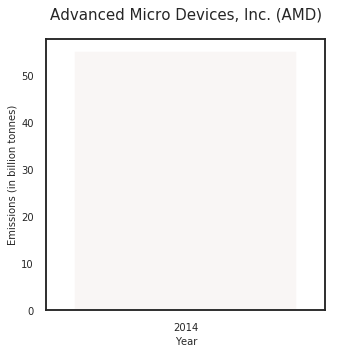

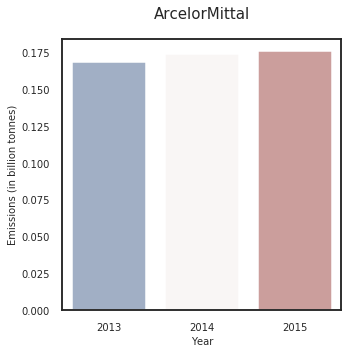

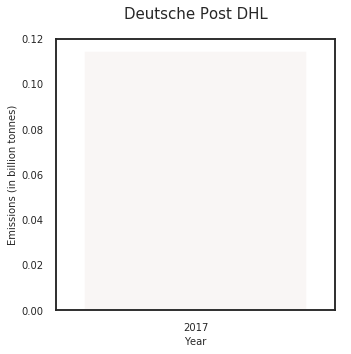

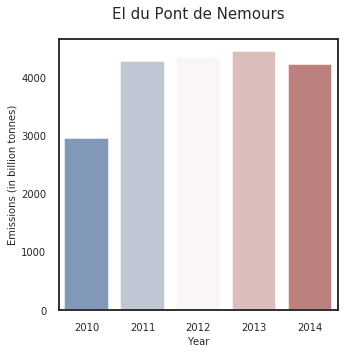

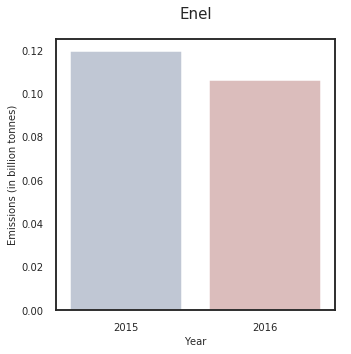

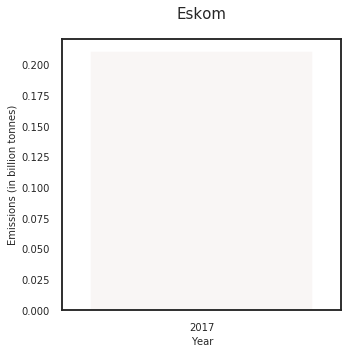

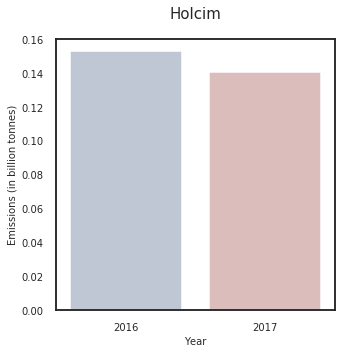

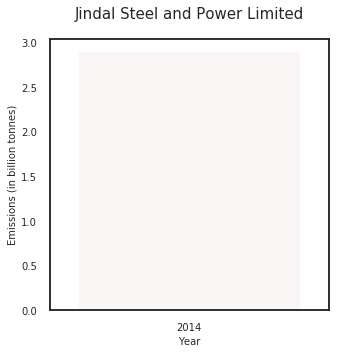

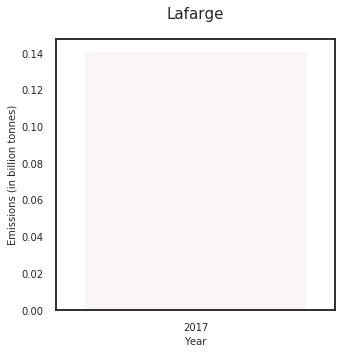

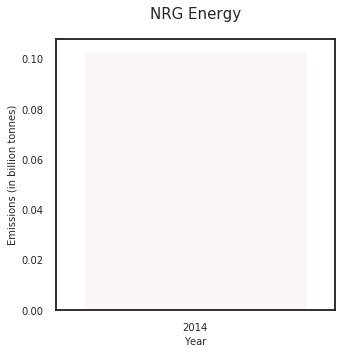

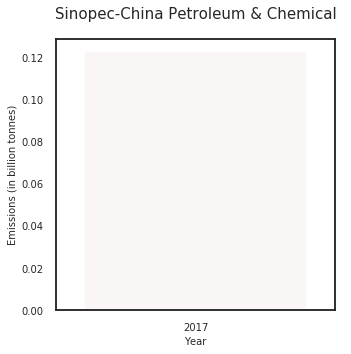

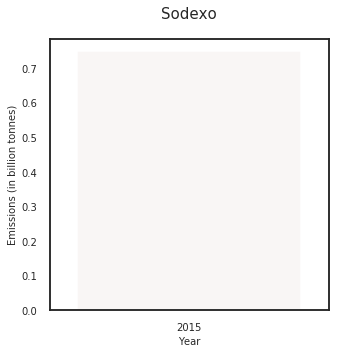

                               company  average_emissions
0   Advanced Micro Devices, Inc. (AMD)          55.121000
1                        ArcelorMittal           0.173000
2                    Deutsche Post DHL           0.114480
3                EI du Pont de Nemours        4060.466000
4                                 Enel           0.112900
5                                Eskom           0.211100
6                               Holcim           0.147000
7       Jindal Steel and Power Limited           2.906883
8                              Lafarge           0.141000
9                           NRG Energy           0.103000
10  Sinopec-China Petroleum & Chemical           0.123050
11                              Sodexo           0.749878


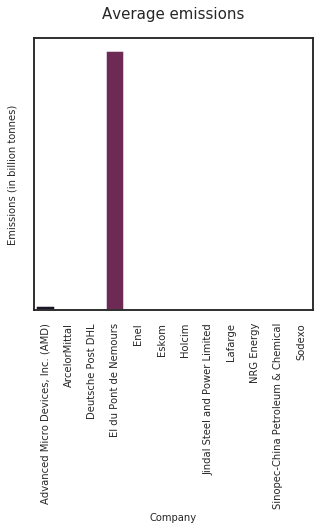

In [229]:
plot_metric("Greenhouse_Gas_Emissions_Scope_1")

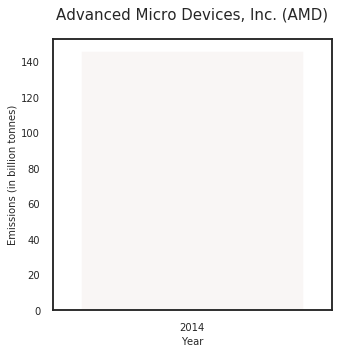

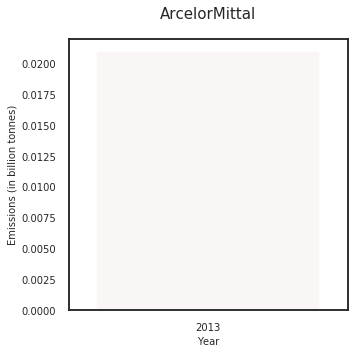

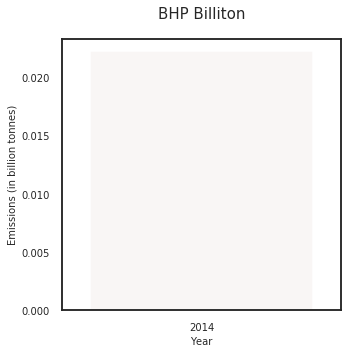

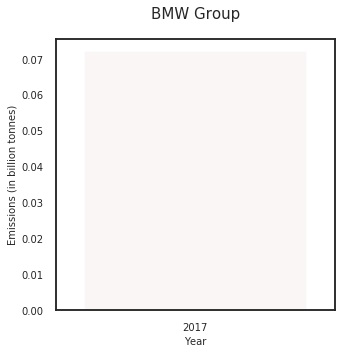

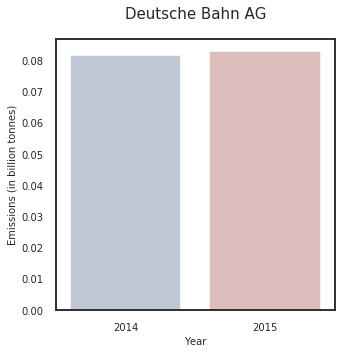

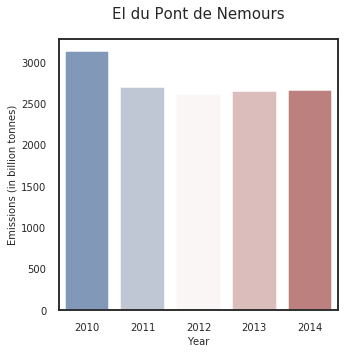

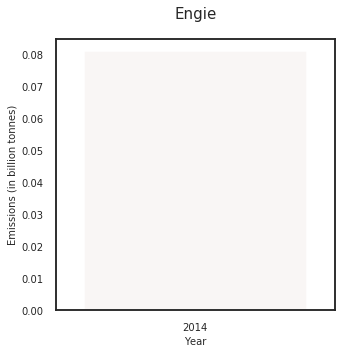

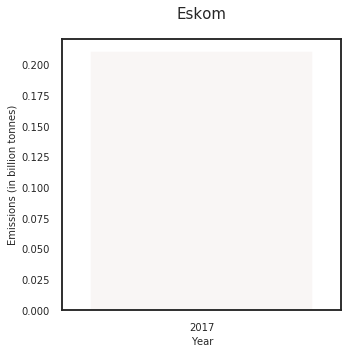

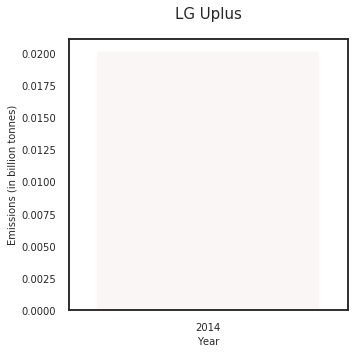

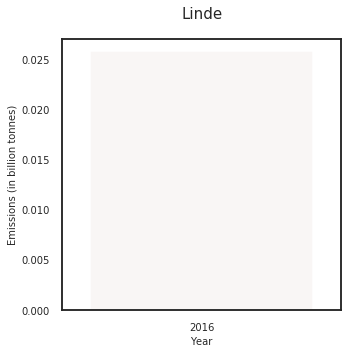

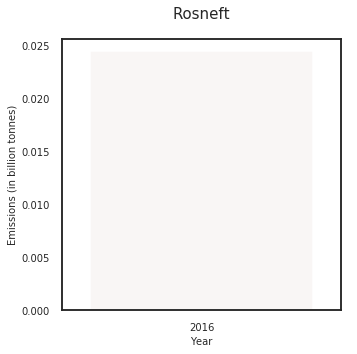

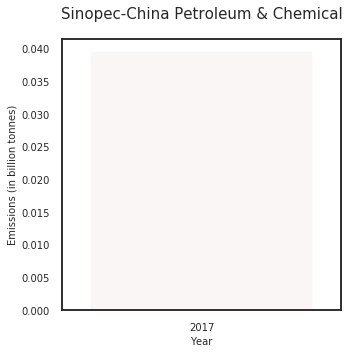

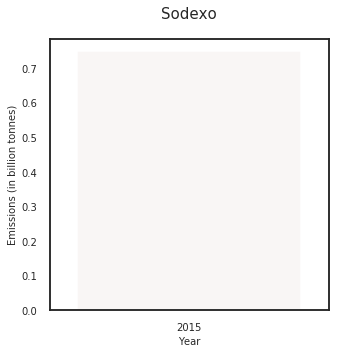

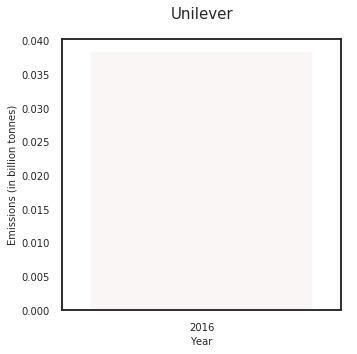

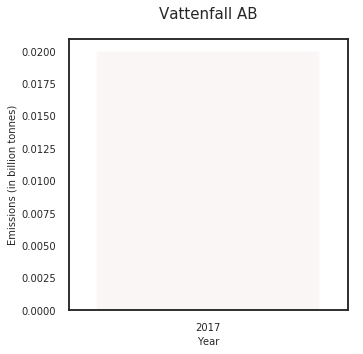

                               company  average_emissions
0   Advanced Micro Devices, Inc. (AMD)         145.832000
1                        ArcelorMittal           0.021000
2                         BHP Billiton           0.022300
3                            BMW Group           0.072202
4                     Deutsche Bahn AG           0.082500
5                EI du Pont de Nemours        2753.236000
6                                Engie           0.081000
7                                Eskom           0.211100
8                             LG Uplus           0.020208
9                                Linde           0.025800
10                             Rosneft           0.024500
11  Sinopec-China Petroleum & Chemical           0.039610
12                              Sodexo           0.749878
13                            Unilever           0.038440
14                       Vattenfall AB           0.020000


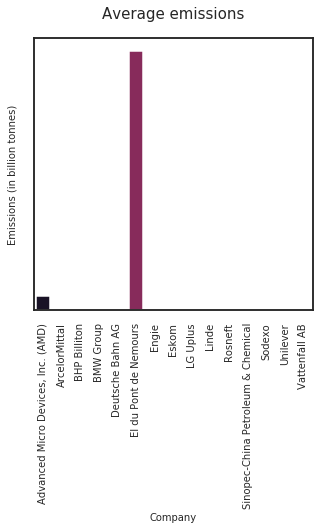

In [230]:
plot_metric("Greenhouse_Gas_Emissions_Scope_2")

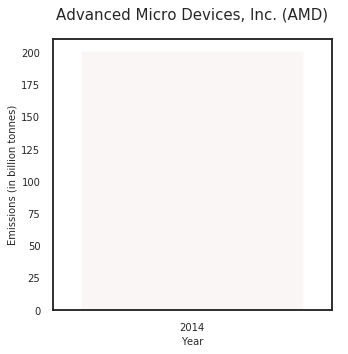

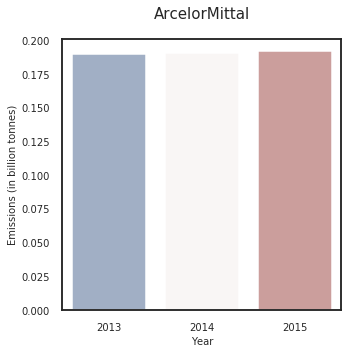

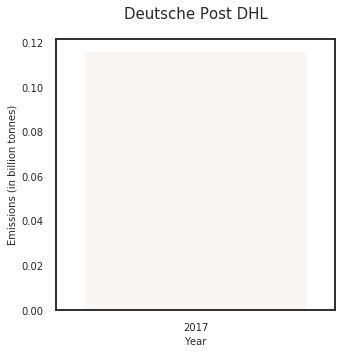

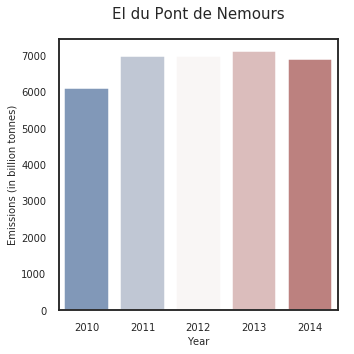

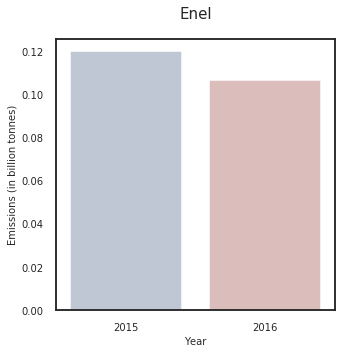

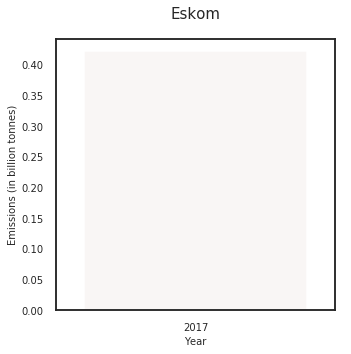

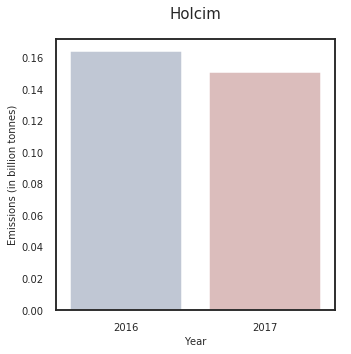

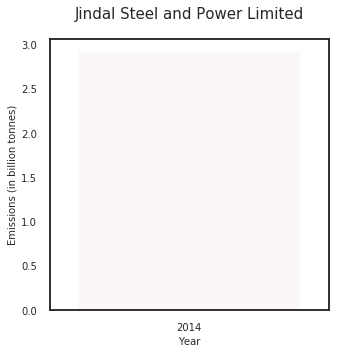

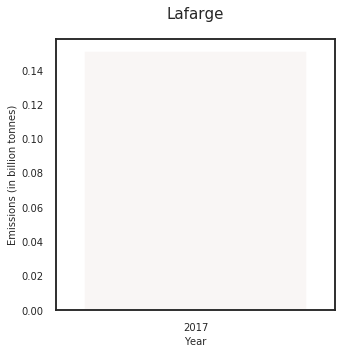

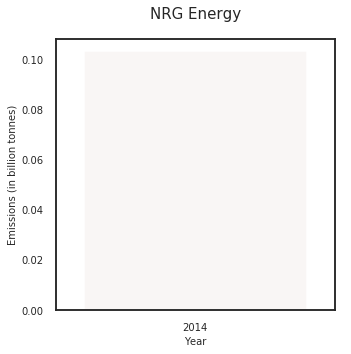

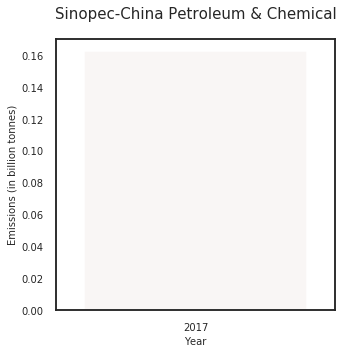

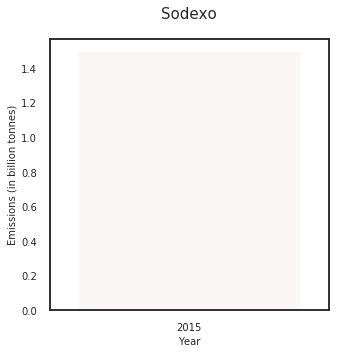

                               company  average_emissions
0   Advanced Micro Devices, Inc. (AMD)         200.953000
1                        ArcelorMittal           0.191000
2                    Deutsche Post DHL           0.116200
3                EI du Pont de Nemours        6813.702000
4                                 Enel           0.113535
5                                Eskom           0.422200
6                               Holcim           0.157500
7       Jindal Steel and Power Limited           2.925507
8                              Lafarge           0.151000
9                           NRG Energy           0.103259
10  Sinopec-China Petroleum & Chemical           0.162660
11                              Sodexo           1.499757


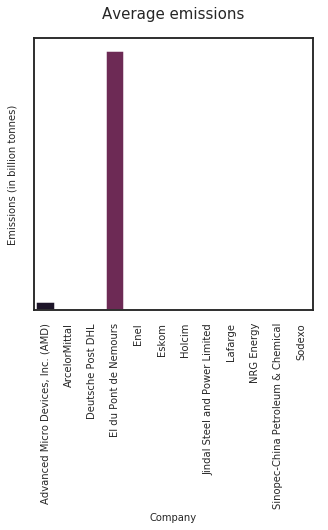

In [231]:
plot_metric("Greenhouse_Gas_Emissions_Scope_1_and_2_combined")